In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
filename = 'experiments/qlearning/0advs0.05fpr0.15fnr_test_actions_len.npy'
a = np.load(filename)
new_arr = []

new_arr.append(a[0])
for i in range(1, len(a)):
    new_arr.append(a[i]-a[i-1])

In [6]:
a

array([   5,    6,    8,   12,   18,   21,   23,   24,   29,   31,   38,
         40,   47,   48,   51,   52,   57,   61,   62,   63,   64,   69,
         74,   75,   77,   83,   84,   85,   91,   96,  102,  103,  110,
        114,  116,  121,  125,  126,  128,  134,  138,  144,  145,  147,
        153,  156,  159,  166,  171,  172,  173,  175,  179,  185,  190,
        195,  196,  198,  199,  202,  207,  212,  217,  224,  226,  227,
        229,  233,  234,  239,  244,  250,  255,  256,  260,  264,  269,
        275,  280,  284,  290,  295,  302,  307,  313,  317,  321,  322,
        324,  330,  335,  340,  344,  349,  355,  356,  358,  365,  370,
        376,  381,  386,  387,  388,  393,  395,  402,  404,  410,  413,
        417,  420,  422,  427,  428,  434,  437,  442,  449,  450,  451,
        452,  454,  460,  463,  464,  469,  475,  478,  479,  485,  487,
        494,  496,  498,  501,  507,  512,  518,  522,  526,  532,  537,
        539,  541,  545,  547,  550,  554,  558,  5

In [9]:
len(new_arr)

1000

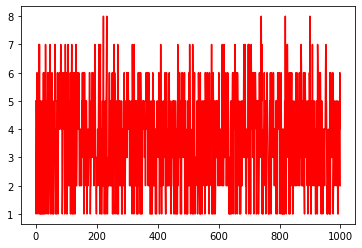

In [19]:
plt.plot(range(len(new_arr)),new_arr, 'r-')

In [25]:
filename = 'experiments/qlearning/0advs0.05fpr0.15fnr_episode_rewards.npy'
a = np.load(filename)


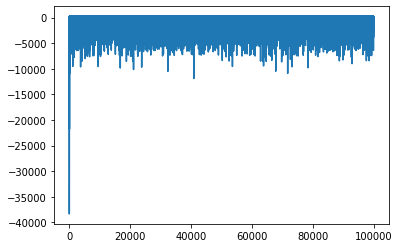

In [42]:
plt.plot(a)

In [38]:
theta = np.polyfit(range(len(new_arr)),new_arr, 2)

# print(f'The parameters of the curve: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0, theta1 and theta2
y_line = theta[2] + theta[1] * pow(new_arr, 1) + theta[0] * pow(new_arr, 2)
plt.scatter(range(len(new_arr)),new_arr)
plt.plot(range(len(new_arr)),y_line, 'r')

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [61]:
for advs in range(6):
    filename = 'experiments/qlearning/'+str(advs)+'advs0.05fpr0.15fnr_test_rewards.npy'
    a = np.load(filename)
#     if advs==0:
#         print(a)
#     print(np.count_nonzero(a))
    print(np.mean(a))
    print(np.median(a))
    print(np.std(a))
    print()

233.99
230.0
24.70991501401816

163.95
210.0
194.7734517330327

71.18
210.0
346.1485340139403

-116.24
180.0
455.178714792333

-122.88
170.0
471.0404500677197

-229.66
140.0
541.514620670578



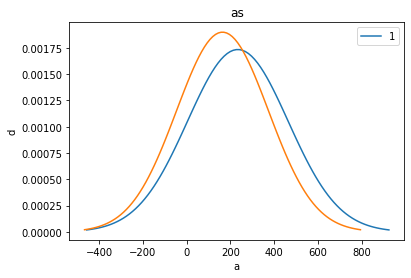

In [69]:
import scipy.stats as stats
import math

mu = 233.99
sigma = 230.0
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label="1")

mu = 163.95
sigma = 210.0
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title("as")
plt.xlabel("a")
plt.ylabel("d")
plt.legend()
# plt.show()
plt.savefig("t.png", format='png')

In [50]:
np.median(a)

-580.0

In [51]:
np.std(a)

1307.5189849650328

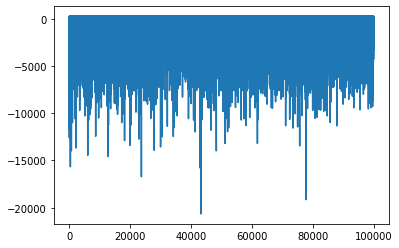

In [52]:
plt.plot(a)

In [3]:
def get_file(filename):
    return np.load(filename)

In [4]:
algorithm = ['qlearning', 'sarsa', 'sarsalambda', 'qlambda', 'baseline']
advs = range(6)
data = {
    "algorithm" : [],
    "num_advs" : [],
    "successes" : [],
    "average_its": [],
    "average_reward": []
}

for alg in algorithm:
    for adv in advs:
        test_rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_rewards.npy')
        test_its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_actions_len.npy')
        test_results = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_result.npy')
        
        test_its_fixed = []

        test_its_fixed.append(test_its[0])
        for i in range(1, len(test_its)):
            test_its_fixed.append(test_its[i]-test_its[i-1])

#         its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
#         result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
#         rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')

        data['algorithm'].append(alg)
        data['num_advs'].append(adv)
        data['successes'].append(np.count_nonzero(test_results)/len(test_results))
        data['average_its'].append(np.mean(test_its_fixed))
        data['average_reward'].append(np.mean(test_rewards))
        


In [5]:
import pandas as pd
df = pd.DataFrame(data)

In [6]:
df

,algorithm,num_advs,successes,average_its,average_reward
0,qlearning,0,1.000000,3.669000,233.990000
1,qlearning,1,0.941000,3.639000,163.950000
2,qlearning,2,0.862000,4.314000,71.180000
3,qlearning,3,0.645000,5.486000,-116.240000
4,qlearning,4,0.667000,4.862000,-122.880000
5,qlearning,5,0.562000,5.569000,-229.660000
6,sarsa,0,1.000000,4.092000,210.860000
7,sarsa,1,0.854000,5.473000,72.100000
8,sarsa,2,0.716000,5.836000,-30.250000
9,sarsa,3,0.764000,3.397000,10.200000


In [88]:
df.to_latex()

'\\begin{tabular}{llrrrr}\n\\toprule\n{} &    algorithm &  num\\_advs &  successes &  average\\_its &  average\\_reward \\\\\n\\midrule\n0  &    qlearning &         0 &   1.000000 &     3.669000 &      233.990000 \\\\\n1  &    qlearning &         1 &   0.941000 &     3.639000 &      163.950000 \\\\\n2  &    qlearning &         2 &   0.862000 &     4.314000 &       71.180000 \\\\\n3  &    qlearning &         3 &   0.645000 &     5.486000 &     -116.240000 \\\\\n4  &    qlearning &         4 &   0.667000 &     4.862000 &     -122.880000 \\\\\n5  &    qlearning &         5 &   0.562000 &     5.569000 &     -229.660000 \\\\\n6  &        sarsa &         0 &   1.000000 &     4.092000 &      210.860000 \\\\\n7  &        sarsa &         1 &   0.854000 &     5.473000 &       72.100000 \\\\\n8  &        sarsa &         2 &   0.716000 &     5.836000 &      -30.250000 \\\\\n9  &        sarsa &         3 &   0.764000 &     3.397000 &       10.200000 \\\\\n10 &        sarsa &         4 &   0.611000 

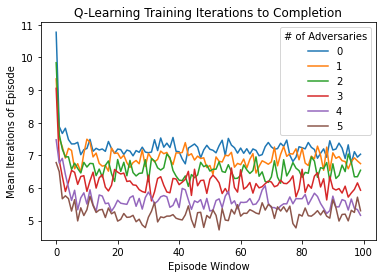

In [101]:
advs = range(6)
alg = "qlearning"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<100000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_its, label=str(adv))
    

plt.title("Q-Learning Training Iterations to Completion")
plt.xlabel("Episode Window")
plt.ylabel("Mean Iterations of Episode")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("qlearning train its.png", format='png')

In [ ]:
Graphs/Plots

(maybe by bins)
Training curve of rewards vs episode
train curve its vs episode
train curve results vs episodes

TEST DATA
num of + vs -
average/median num of actions
average/median reward

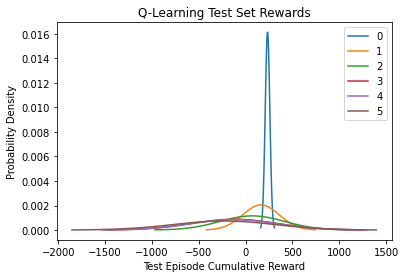

In [85]:
advs = range(6)
alg = "qlearning"
for adv in advs:
    test_rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_rewards.npy')
    test_its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_actions_len.npy')
    test_results = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_result.npy')

    test_its_fixed = []

    test_its_fixed.append(test_its[0])
    for i in range(1, len(test_its)):
        test_its_fixed.append(test_its[i]-test_its[i-1])

#         its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
#         result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
#         rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')

    mu = np.mean(test_rewards)
    sigma = np.std(test_rewards)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=str(adv))

plt.title("Q-Learning Test Set Rewards")
plt.xlabel("Test Episode Cumulative Reward")
plt.ylabel("Probability Density")
plt.legend()
# plt.show()
plt.savefig("qlearning test reward dists.png", format='png')



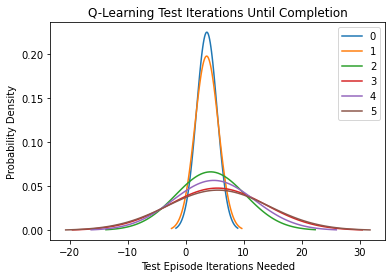

In [86]:
advs = range(6)
alg = "qlearning"
for adv in advs:
    test_rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_rewards.npy')
    test_its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_actions_len.npy')
    test_results = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_result.npy')

    test_its_fixed = []

    test_its_fixed.append(test_its[0])
    for i in range(1, len(test_its)):
        test_its_fixed.append(test_its[i]-test_its[i-1])

#         its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
#         result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
#         rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')

    mu = np.mean(test_its_fixed)
    sigma = np.std(test_its_fixed)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=str(adv))

plt.title("Q-Learning Test Iterations Until Completion")
plt.xlabel("Test Episode Iterations Needed")
plt.ylabel("Probability Density")
plt.legend()
# plt.show()
plt.savefig("qlearning test its dists.png", format='png')



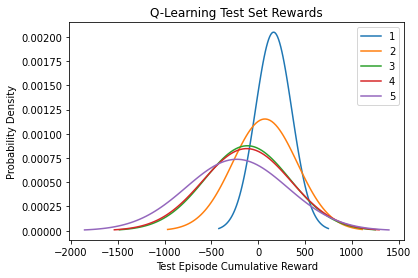

In [87]:
advs = range(1, 6)
alg = "qlearning"
for adv in advs:
    test_rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_rewards.npy')
    test_its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_actions_len.npy')
    test_results = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_test_result.npy')

    test_its_fixed = []

    test_its_fixed.append(test_its[0])
    for i in range(1, len(test_its)):
        test_its_fixed.append(test_its[i]-test_its[i-1])

#         its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
#         result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
#         rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')

    mu = np.mean(test_rewards)
    sigma = np.std(test_rewards)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=str(adv))

plt.title("Q-Learning Test Set Rewards")
plt.xlabel("Test Episode Cumulative Reward")
plt.ylabel("Probability Density")
plt.legend()
# plt.show()
plt.savefig("qlearning test reward dists without 0.png", format='png')

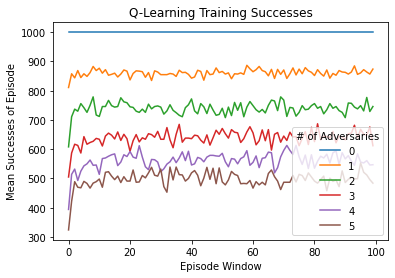

In [100]:
advs = range(6)
alg = "qlearning"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<100000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_res, label=str(adv))
    

plt.title("Q-Learning Training Successes")
plt.xlabel("Episode Window")
plt.ylabel("Mean Successes of Episode")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("qlearning train res.png", format='png')

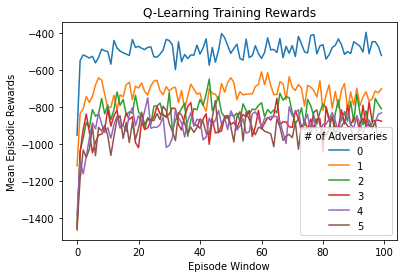

In [102]:
advs = range(6)
alg = "qlearning"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<100000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_rew, label=str(adv))
    

plt.title("Q-Learning Training Rewards")
plt.xlabel("Episode Window")
plt.ylabel("Mean Episodic Rewards")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("qlearning train rew.png", format='png')

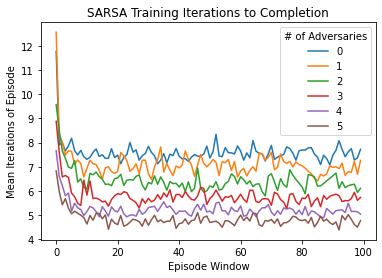

In [103]:
advs = range(6)
alg = "sarsa"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<100000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_its, label=str(adv))
    

plt.title("SARSA Training Iterations to Completion")
plt.xlabel("Episode Window")
plt.ylabel("Mean Iterations of Episode")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("sarsa train its.png", format='png')

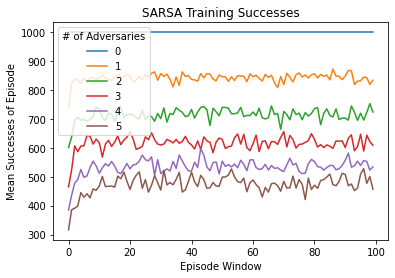

In [104]:
advs = range(6)
alg = "sarsa"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<100000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_res, label=str(adv))
    

plt.title("SARSA Training Successes")
plt.xlabel("Episode Window")
plt.ylabel("Mean Successes of Episode")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("sarsa train res.png", format='png')

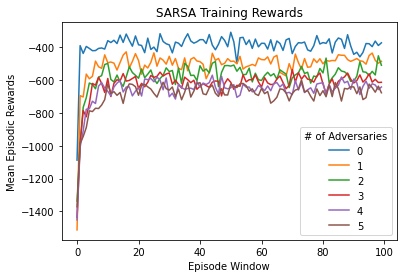

In [105]:
advs = range(6)
alg = "sarsa"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<100000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_rew, label=str(adv))
    

plt.title("SARSA Training Rewards")
plt.xlabel("Episode Window")
plt.ylabel("Mean Episodic Rewards")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("sarsa train rew.png", format='png')

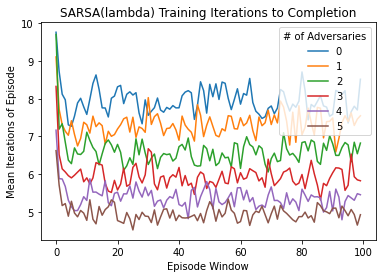

In [106]:
advs = range(6)
alg = "sarsalambda"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<100000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_its, label=str(adv))
    

plt.title("SARSA(lambda) Training Iterations to Completion")
plt.xlabel("Episode Window")
plt.ylabel("Mean Iterations of Episode")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("sarsalambda train its.png", format='png')

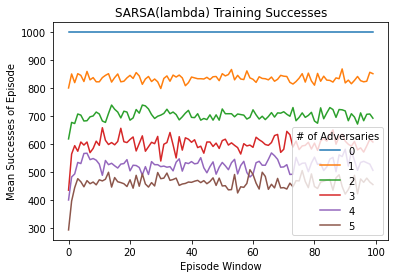

In [107]:
advs = range(6)
alg = "sarsalambda"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<100000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_res, label=str(adv))
    

plt.title("SARSA(lambda) Training Successes")
plt.xlabel("Episode Window")
plt.ylabel("Mean Successes of Episode")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("sarsalambda train res.png", format='png')

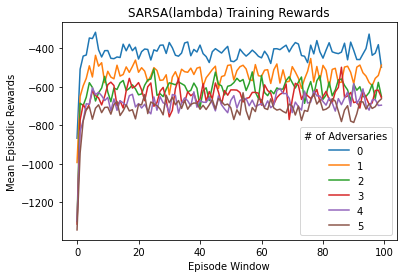

In [108]:
advs = range(6)
alg = "sarsalambda"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<100000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_rew, label=str(adv))
    

plt.title("SARSA(lambda) Training Rewards")
plt.xlabel("Episode Window")
plt.ylabel("Mean Episodic Rewards")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("sarsalambda train rew.png", format='png')

/home/gaurab/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gaurab/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


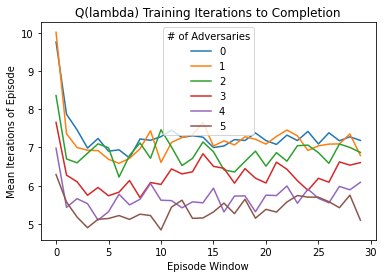

In [109]:
advs = range(6)
alg = "qlambda"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<100000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_its, label=str(adv))
    

plt.title("Q(lambda) Training Iterations to Completion")
plt.xlabel("Episode Window")
plt.ylabel("Mean Iterations of Episode")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("qlambda train its.png", format='png')

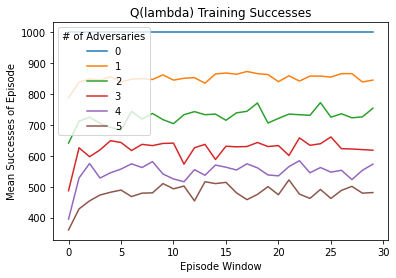

In [112]:
advs = range(6)
alg = "qlambda"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<30000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_res, label=str(adv))
    

plt.title("Q(lambda) Training Successes")
plt.xlabel("Episode Window")
plt.ylabel("Mean Successes of Episode")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("qlambda train res.png", format='png')

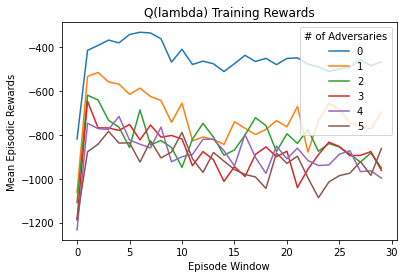

In [111]:
advs = range(6)
alg = "qlambda"

for adv in advs:
    m_its = []
    m_res = []
    m_rew = []
    its = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_iterations.npy')
    result = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_result.npy')
    rewards = get_file('experiments/' + alg + '/' + str(adv) + 'advs0.05fpr0.15fnr_episode_rewards.npy')
    
    i=0
    while i<100000:
        m_its.append(np.mean(its[i: i+1000]))
        m_res.append(np.count_nonzero(result[i: i+1000]))
        m_rew.append(np.mean(rewards[i: i+1000]))
        i += 1000
        
    plt.plot(m_rew, label=str(adv))
    

plt.title("Q(lambda) Training Rewards")
plt.xlabel("Episode Window")
plt.ylabel("Mean Episodic Rewards")
plt.legend(title = "# of Adversaries")
# plt.show()
plt.savefig("qlambda train rew.png", format='png')